In [1]:
import numpy 
import pandas 
from sklearn.linear_model import LinearRegression
import seaborn as sns 

import plotly.io as pio
import plotly.express as px 
pio.renderers.default = 'jupyterlab'

from scipy.stats import pearsonr
import networkx as nx
import matplotlib.pyplot as plt

>**Simpson's Paradox** occurs when a trend evident within individual subgroups reverses when those groups are combined. This statistical anomaly underscores the risks of drawing conclusions from aggregate data without considering subgroup structures. In terms of causal inference, it highlights the importance of accounting for context and potential confounding variables, emphasizing that aggregate trends can sometimes be misleading about underlying causal relationships.

## Controlling for a collider

In [2]:
N = 1000
rho_mixing = 0.8
rho = 0.1
eta = 0.3
eta_z = 0

x = numpy.random.normal(0,1,N)
y = rho * x + eta * numpy.random.normal(0,1,N)
z = rho_mixing * x + rho_mixing*y + eta_z * numpy.random.normal(0,1,N)

df = pandas.DataFrame({'x':x, 'y': y, 'z':z})
df['z'] = pandas.qcut(df['z'],5,labels = False).astype(object)

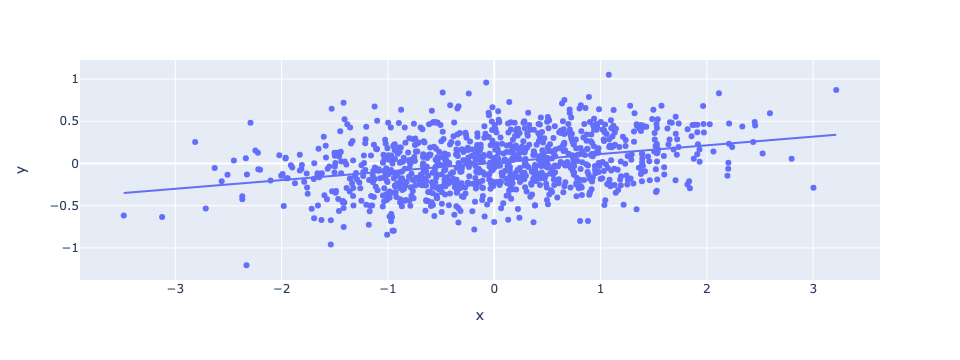

In [3]:
px.scatter( df, x = 'x', y = 'y', trendline= 'ols' )

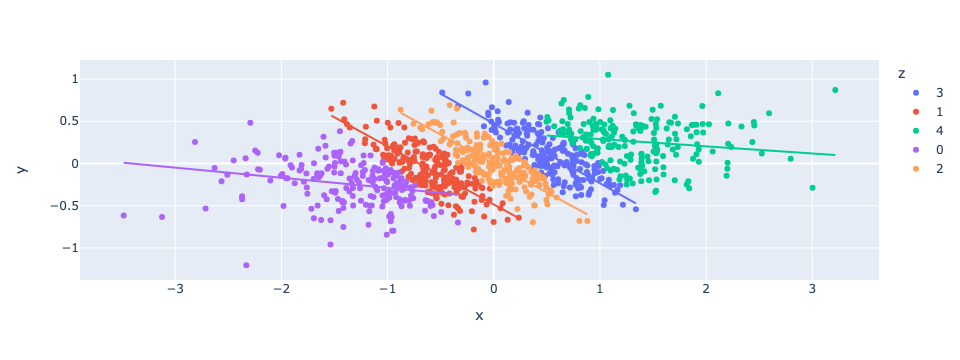

In [4]:
px.scatter( df, x = 'x', y = 'y', color = 'z', trendline= 'ols' )

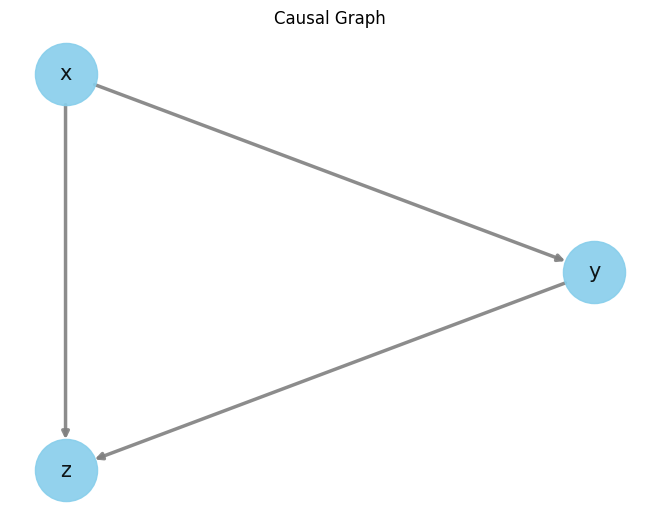

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from utils import plot_graph

# Create a directed graph
G = nx.DiGraph()

# Define nodes and edges
nodes = ['y', 'x', 'z']
edges = [('x', 'y'), ('x', 'z'), ('y', 'z')]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plot_graph(G)

## Failing to control for a confounder

> **Real world story**: we worked with a company that was faced with the following problem:
> Their data showed that **the higher the discounts** they offered, the **less likely** customers were **to convert**

In [6]:
N = 1000
rho_z = 0.5
rho = 0.5
eta = 0.3
eta_z = 0


z = numpy.random.normal(0,1,N)
x = rho_z * z + eta * numpy.random.normal(0,1,N)
y = rho * x - rho_z * z + eta * numpy.random.normal(0,1,N)

df = pandas.DataFrame({'Discounts':x, 'Conversions': y, 'Months since last order':z})

df['Months since last order'] = pandas.qcut(df['Months since last order'],5,labels = False).astype(object)

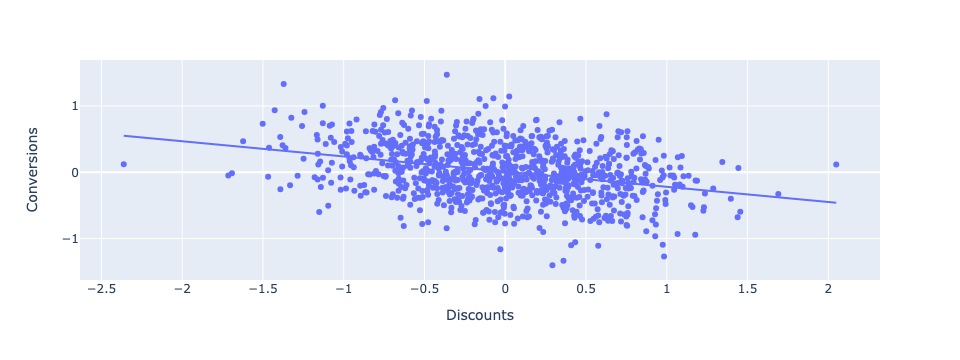

In [7]:
px.scatter( df, x = 'Discounts', y = 'Conversions' , trendline = 'ols')

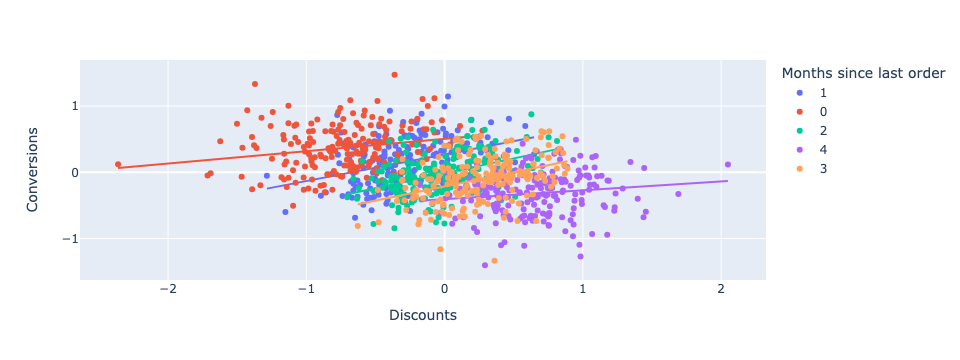

In [8]:
px.scatter( df, x = 'Discounts', y = 'Conversions', color = 'Months since last order', trendline = 'ols' )

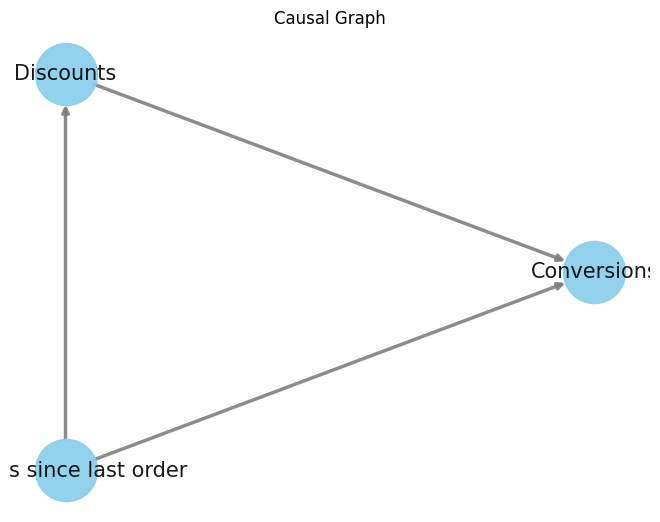

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from utils import plot_graph

# Create a directed graph
G = nx.DiGraph()

# Define nodes and edges
nodes = ['Conversions', 'Discounts', 'Months since last order']
edges = [('Months since last order', 'Discounts'), ('Months since last order', 'Conversions'), ('Discounts', 'Conversions')]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plot_graph(G)